## Autoencoder

* 오토인코더는 간단한 비지도 학습 딥러닝 모형입니다. 입력을 압축한 후 다시 출력하는 모형으로 다양한 응용 분야가 있습니다.
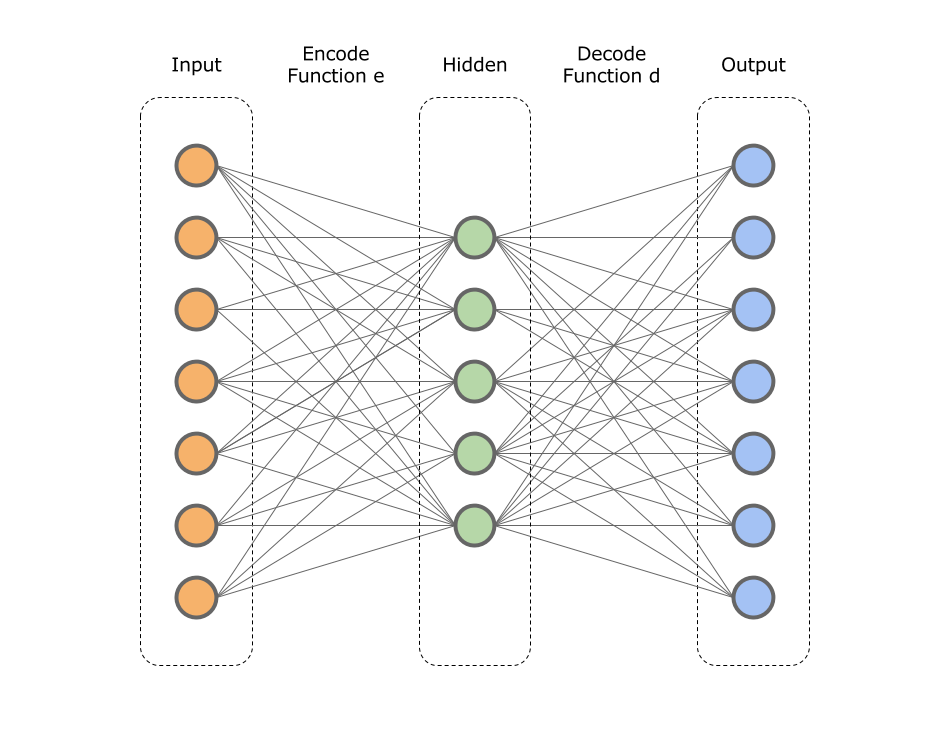

In [1]:
# MNIST
import numpy as np
from tensorflow import keras
from keras import models 
from keras import layers
from keras.datasets import mnist
from keras.utils import to_categorical
import matplotlib.pyplot as plt

In [24]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train=X_train/255
X_test=X_test/255

In [25]:
X_train = X_train.reshape(len(X_train), len(X_train[1])*len(X_train[1]))
X_test = X_test.reshape(len(X_test), len(X_test[1])*len(X_test[1]))

In [26]:
X_train.shape

(60000, 784)

In [68]:
auto = models.Sequential()
auto.add(layers.Dense(16, activation='relu', input_shape=(28*28,))) 
auto.add(layers.Dense(28*28, activation='sigmoid')) 
auto.compile(optimizer='nadam',loss='binary_crossentropy',metrics=['acc'])

In [69]:
auto.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 16)                12560     
_________________________________________________________________
dense_21 (Dense)             (None, 784)               13328     
Total params: 25,888
Trainable params: 25,888
Non-trainable params: 0
_________________________________________________________________


In [70]:
auto.fit(X_train,X_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 1s 2ms/step - loss: 0.2679 - acc: 0.0123 - val_loss: 0.1960 - val_acc: 0.0120
Epoch 2/10
375/375 [==============================] - 1s 2ms/step - loss: 0.1789 - acc: 0.0104 - val_loss: 0.1654 - val_acc: 0.0107
Epoch 3/10
375/375 [==============================] - 1s 2ms/step - loss: 0.1577 - acc: 0.0095 - val_loss: 0.1516 - val_acc: 0.0111
Epoch 4/10
375/375 [==============================] - 1s 2ms/step - loss: 0.1481 - acc: 0.0103 - val_loss: 0.1454 - val_acc: 0.0107
Epoch 5/10
375/375 [==============================] - 1s 2ms/step - loss: 0.1434 - acc: 0.0094 - val_loss: 0.1420 - val_acc: 0.0122
Epoch 6/10
375/375 [==============================] - 1s 2ms/step - loss: 0.1402 - acc: 0.0093 - val_loss: 0.1392 - val_acc: 0.0114
Epoch 7/10
375/375 [==============================] - 1s 2ms/step - loss: 0.1376 - acc: 0.0103 - val_loss: 0.1369 - val_acc: 0.0116
Epoch 8/10
375/375 [==============================] - 1s 2ms/step - loss: 0.

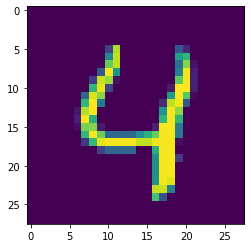

In [71]:
plt.imshow(X_test[4].reshape(28, 28))

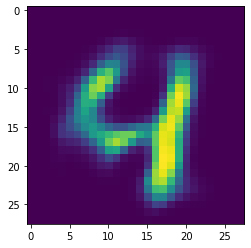

In [72]:
pre=auto.predict(X_test)
plt.imshow(pre[4].reshape(28, 28))

In [75]:
from keras.datasets import fashion_mnist
(X, y), (X_test, y_test) = fashion_mnist.load_data()
X=X/255
X = X.reshape(len(X), len(X[1])*len(X[1]))


In [76]:
fash=auto.predict(X)

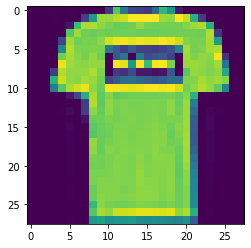

In [77]:
plt.imshow(X[1].reshape(28, 28))

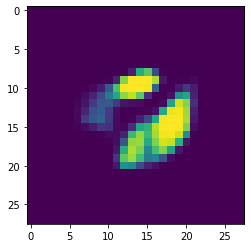

In [78]:
pre=auto.predict(X)
plt.imshow(pre[1].reshape(28, 28))